## Sarcasm Detection on YouTube Comments - Data Preprocessing

 sarcasm detection in YouTube comments using Machine Learning.

**Problem Description**

Sarcasm is a powerful tool in human communication, using a layer of irony to convey a meaning opposite the surface level. It often employs positive language to express negativity, or vice versa. This complexity makes it a major challenge for Natural Language Processing (NLP) tasks like sentiment analysis, where the goal is to understand the emotional tone of text.


### Loading dataset & Displayed some row's

In [2]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'sarcasm_training (1).csv'
df = pd.read_csv(file_path)
df.head()

,text,labels
0,<user> thanks for showing up for our appointme...,1
1,haha . # lol,1
2,i love waiting <num> min for a cab - such shor...,1
3,22 super funny quotes # funnyquotes # funnysa...,1
4,goog morning # sorrynotsorry # morning,1


### Data Cleaning
Clean the data by handling missing values, removing duplicates column

In [3]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print(f'Duplicate rows: {df.duplicated().sum()}')

# Drop duplicates
df.drop_duplicates(inplace=True)

# Display the cleaned dataset
df.reset_index(drop=True, inplace=True)
df.head()

# Display the shape of the cleaned dataset
print(df.shape)
df.head()

text      0
labels    0
dtype: int64
Duplicate rows: 356
(19461, 2)


,text,labels
0,<user> thanks for showing up for our appointme...,1
1,haha . # lol,1
2,i love waiting <num> min for a cab - such shor...,1
3,22 super funny quotes # funnyquotes # funnysa...,1
4,goog morning # sorrynotsorry # morning,1


## Removing the emoji
Removal of "emoji" Patterns: To catch all possible formats of the "emoji" strings.

In [4]:
import pandas as pd
import re


# Function to remove emoji followed by numbers
def remove_emoji_followed_by_numbers(text):
    return re.sub(r'emoji[_\d]+', '', text)

# Apply the function to the DataFrame column
df['text'] = df['text'].apply(remove_emoji_followed_by_numbers)

# Output the modified DataFrame
print(df)

                                                    text  labels
0      <user> thanks for showing up for our appointme...       1
1                                          haha .  # lol       1
2      i love waiting <num> min for a cab - such shor...       1
3      22 super funny quotes # funnyquotes  # funnysa...       1
4                goog morning  # sorrynotsorry # morning       1
...                                                  ...     ...
19456                                 such a good read         0
19457  this is some people 's living conditions , alw...       0
19458  winner - seungyoon ( simple ) - rt if u save -...       0
19459  ok but concept : kravitz passing notes between...       0
19460                   life is good, you should get one       1

[19461 rows x 2 columns]


### Text preprocessing
Text preprocessing includes converting text to lowercase, removing punctuation and special characters, tokenizing, and removing stopwords.

In [5]:
print(df.columns)

Index(['text', 'labels'], dtype='object')


In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# Download NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()
# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)
    # Apply preprocessing to the comments
df['cleaned_comment'] = df['text'].apply(preprocess_text)
# Display the first few rows of the preprocessed dataset
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,text,labels,cleaned_comment
0,<user> thanks for showing up for our appointme...,1,user thanks showing appointment today
1,haha . # lol,1,haha lol
2,i love waiting <num> min for a cab - such shor...,1,love waiting num min cab shortage user please ...
3,22 super funny quotes # funnyquotes # funnysa...,1,22 super funny quote funnyquotes funnysayings ...
4,goog morning # sorrynotsorry # morning,1,goog morning sorrynotsorry morning


### Data Visualization
Visualize the distribution of the labels to understand the class balance in dataset. Represent data counts and percentage format for better understanding

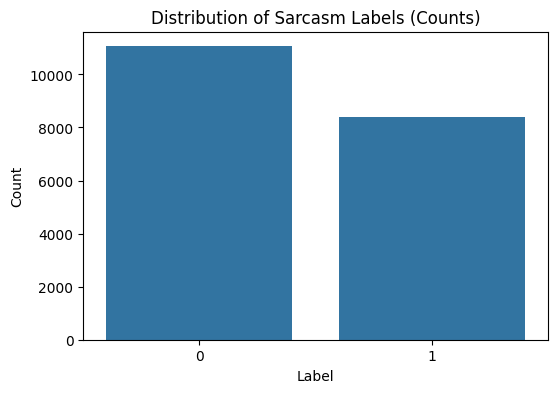

labels
0    11056
1     8405
Name: count, dtype: int64
labels
0    56.811058
1    43.188942
Name: count, dtype: float64


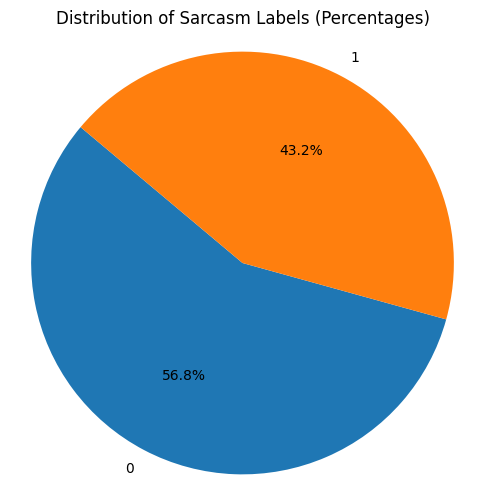

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of labels in counts (Bar Chart)
plt.figure(figsize=(6,4))
sns.countplot(x='labels', data=df)
plt.title('Distribution of Sarcasm Labels (Counts)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Display the value counts of the labels
label_counts = df['labels'].value_counts()
print(label_counts)

# Calculate the percentage distribution of labels
label_percentages = 100 * label_counts / len(df)
print(label_percentages)

# Plot the distribution of labels in percentages (Pie Chart)
plt.figure(figsize=(6,6))
plt.pie(label_percentages, labels=label_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sarcasm Labels (Percentages)')
plt.axis('equal')
plt.show()

### Final Preparation
Prepare the data for input into a deep learning model by splitting the data into training and testing sets, tokenizing the sequences

In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Split the data into training and testing sets
X = df['cleaned_comment']
y = df['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences
max_len = max(len(seq) for seq in X_train_seq)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Display the shape of the padded data
print(f'Training data shape: {X_train_pad.shape}')
print(f'Testing data shape: {X_test_pad.shape}')


display(df)

# df.to_csv('processed_data2.csv', index=False)

Training data shape: (15568, 29)
Testing data shape: (3893, 29)


,text,labels,cleaned_comment
0,<user> thanks for showing up for our appointme...,1,user thanks showing appointment today
1,haha . # lol,1,haha lol
2,i love waiting <num> min for a cab - such shor...,1,love waiting num min cab shortage user please ...
3,22 super funny quotes # funnyquotes # funnysa...,1,22 super funny quote funnyquotes funnysayings ...
4,goog morning # sorrynotsorry # morning,1,goog morning sorrynotsorry morning
...,...,...,...
19456,such a good read,0,good read
19457,"this is some people 's living conditions , alw...",0,people living condition always remember blesse...
19458,winner - seungyoon ( simple ) - rt if u save -...,0,winner seungyoon simple rt u save repost edit ...
19459,ok but concept : kravitz passing notes between...,0,ok concept kravitz passing note magnus julia p...


### Data Encoding
**TF-IDF Encoding**

TF-IDF encoding combines Term Frequency (TF) with Inverse Document Frequency (IDF), which measures how unique or rare a term is across a collection of documents. This technique helps in highlighting words that are important to specific documents while down-weighting common terms that appear frequently across many documents. It balances the term's local importance with its global significance, making it a robust method for text representation in natural language processing

so, in data encoding section i used TF-IDF encoding techning which is more relevent on youtube comments dataset to encode text format ate

In [12]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Split data for TF-IDF encoding
X_train_text, X_test_text, y_train, y_test = train_test_split(df['cleaned_comment'], df['labels'], test_size=0.2, random_state=42)

# TF-IDF Encoding
vectorizer_tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train_text)
X_test_tfidf = vectorizer_tfidf.transform(X_test_text)

# Define and train the Random Forest classifier for TF-IDF
def train_rf(X_train, X_test, y_train, y_test):
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Test Accuracy: {accuracy * 100:.2f}%')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))

# TF-IDF Encoding Results
print("TF-IDF Encoding Results:")
train_rf(X_train_tfidf, X_test_tfidf, y_train, y_test)

TF-IDF Encoding Results:
Test Accuracy: 73.54%
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.83      0.78      2182
           1       0.74      0.62      0.67      1711

    accuracy                           0.74      3893
   macro avg       0.74      0.72      0.73      3893
weighted avg       0.74      0.74      0.73      3893

Confusion Matrix:
[[1807  375]
 [ 655 1056]]


In [14]:
print("Training and testing sets prepared.")
print("TF-IDF Encoded shape:", X_train_tfidf.shape)

Training and testing sets prepared.
TF-IDF Encoded shape: (15568, 5000)


### Handling Imbalanced Data
To address the issue of imbalanced datasets, we use a combination of oversampling, class weight adjustment, and appropriate evaluation metrics.

Oversampling: We use SMOTE to balance class distribution by generating synthetic samples for the minority class. Class Weight Adjustment: We adjust model class weights to penalize misclassifications of the minority class more heavily. Evaluation Metrics: Precision, Recall, F1-Score, and AUC-ROC are used instead of accuracy to better evaluate model performance.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19461 entries, 0 to 19460
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   text             19461 non-null  object
 1   labels           19461 non-null  int64 
 2   cleaned_comment  19461 non-null  object
dtypes: int64(1), object(2)
memory usage: 456.2+ KB
                                                text  labels  \
0  <user> thanks for showing up for our appointme...       1   
1                                      haha .  # lol       1   
2  i love waiting <num> min for a cab - such shor...       1   
3  22 super funny quotes # funnyquotes  # funnysa...       1   
4            goog morning  # sorrynotsorry # morning       1   

                                     cleaned_comment  
0              user thanks showing appointment today  
1                                           haha lol  
2  love waiting num min cab shortage user please ...  
3  22 supe

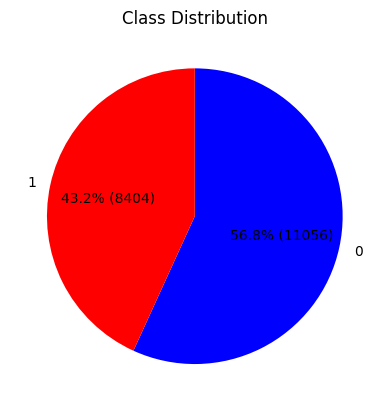

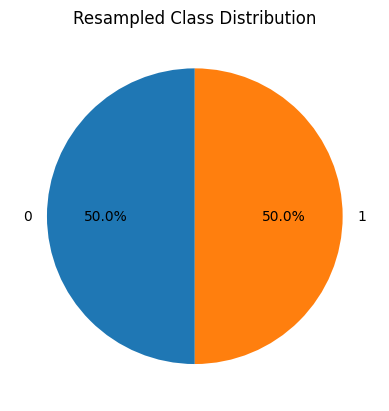

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import vstack
import numpy as np

# Display basic info about the dataset
df.info()
print(df.head())

# Examine class distribution
label_counts = df['labels'].value_counts(normalize=True)
print(label_counts)

# Plot class distribution as a pie chart
label_counts.plot.pie(autopct=lambda pct: f'{pct:.1f}% ({int(pct * len(df) / 100)})', colors=['blue', 'red'], startangle=90, counterclock=False)
plt.title('Class Distribution')
plt.ylabel('')
plt.show()

# Handle missing values in 'cleaned_comment' column
df['cleaned_comment'] = df['cleaned_comment'].fillna('')

# Separate features and labels
features = df['cleaned_comment']
labels = df['labels']

# Shuffle the data to ensure each chunk gets a mix of classes
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
features = df['cleaned_comment']
labels = df['labels']

# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer()
features_vectorized = tfidf.fit_transform(features)

# Function to generate data chunks
def chunk_data(data, target, size):
    for start in range(0, data.shape[0], size):
        yield data[start:start + size], target[start:start + size]

# Define chunk size based on available memory
chunk_size = 1000  # Adjust according to your system's memory capacity

smote = SMOTE(random_state=42)
features_resampled_list = []
labels_resampled_list = []

for X_chunk, y_chunk in chunk_data(features_vectorized, labels, chunk_size):
    # Ensure X_chunk and y_chunk have the same number of samples
    if X_chunk.shape[0] != y_chunk.shape[0]:
        raise ValueError(f"Mismatch in number of samples: {X_chunk.shape[0]} in X_chunk, {y_chunk.shape[0]} in y_chunk")

    # Check if chunk contains more than one class
    if len(np.unique(y_chunk)) > 1:
        X_res, y_res = smote.fit_resample(X_chunk, y_chunk)
        features_resampled_list.append(X_res)
        labels_resampled_list.append(y_res)

# Combine all chunks back together
features_resampled = vstack(features_resampled_list)
labels_resampled = np.hstack(labels_resampled_list)

# Visualize the resampled class distribution
resampled_counts = pd.Series(labels_resampled).value_counts(normalize=True)
resampled_counts.plot.pie(autopct='%1.1f%%', startangle=90, title='Resampled Class Distribution')
plt.ylabel('')
plt.show()

### Evaluating the SVM Machine learning model

In [18]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Display basic info about the dataset
#df.info()
print(df.head())

# Display a sample of the text data
print("Sample Text Data:", df['cleaned_comment'].head())

                                                text  labels  \
0  without russia 's influence campaign trump wou...       0   
1  yy598best1 sliding around auto headshotting in...       1   
2                            i 'd never wanna leave        0   
3  saturday night conversations with april . # ma...       1   
4  you don 't know how excited i am to have louis...       1   

                                     cleaned_comment  
0  without russia influence campaign trump would ...  
1  yy598best1 sliding around auto headshotting pu...  
2                                 never wan na leave  
3  saturday night conversation april marriedlife ...  
4            know excited louis promo revolve around  
Sample Text Data: 0    without russia influence campaign trump would ...
1    yy598best1 sliding around auto headshotting pu...
2                                   never wan na leave
3    saturday night conversation april marriedlife ...
4              know excited louis promo revolve

### Class Distribution
It analyzes the distribution of different classes (or labels) in the dataset. It calculates the percentage of each class and visualizes it using a pie chart.

Calculating Class Distribution: counts each label appears in the 'labels' column of the dataframe df and calculates the percentage.

Plotting as Pie Chart: creates a pie chart where each slice represents a class, showing its percentage and count.

labels
0    0.568111
1    0.431889
Name: proportion, dtype: float64


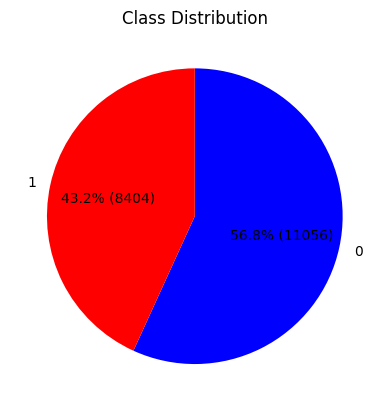

In [19]:
# Examine class distribution
label_counts = df['labels'].value_counts(normalize=True)
print(label_counts)

# Plot class distribution as a pie chart
label_counts.plot.pie(autopct=lambda pct: f'{pct:.1f}% ({int(pct * len(df) / 100)})', colors=['blue', 'red'], startangle=90, counterclock=False)
plt.title('Class Distribution')
plt.ylabel('')
plt.show()

### Vectorize Text Data
It prepares textual data for machine learning models by converting it into numerical form using TF-IDF (Term Frequency-Inverse Document Frequency).

Handling Missing Values: fillna('') fills any missing comments with an empty string.

Vectorization: I used the TF-IDF vectorizer. features_vectorized = tfidf.fit_transform(features) transforms the 'cleaned_comment' text data into a numerical matrix using TF-IDF.

DataFrame Creation:

features_df = pd.DataFrame(features_vectorized.toarray(), columns=tfidf.get_feature_names_out()) converts the TF-IDF matrix into a pandas DataFramores:

get_significant_tfidf_scores() is a function that identifies terms with high TF-IDF scores, indicating their importance in distinguishing classes. A sample of features_df is taken (sample_df) and significant TF-IDF scores are computed and added as significant_tfidf column.

In [20]:
# Replace NaNs with an empty string
df['cleaned_comment'] = df['cleaned_comment'].fillna('')

# Separate features and labels
features = df['cleaned_comment']
labels = df['labels']

# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer()
features_vectorized = tfidf.fit_transform(features)

# Convert the vectorized data to a DataFrame
features_df = pd.DataFrame(features_vectorized.toarray(), columns=tfidf.get_feature_names_out())

# Add the original comments and labels to the DataFrame
features_df['original_comment'] = features.values
features_df['label'] = labels.values

# Function to get significant TF-IDF scores
def get_significant_tfidf_scores(row, terms, threshold=0.1):
    """ Get terms with TF-IDF scores above the threshold. """
    significant_terms = {terms[i]: row[i] for i in range(len(row)) if row[i] > threshold}
    return significant_terms

# Display a sample of the combined data with significant TF-IDF scores
sample_df = features_df.sample(5)  # Sample 5 random rows

# Add significant TF-IDF scores to the sample data
sample_df['significant_tfidf'] = sample_df.drop(columns=['original_comment', 'label']).apply(
    lambda row: get_significant_tfidf_scores(row, tfidf.get_feature_names_out()), axis=1
)

# Select only the relevant columns to display
display_df = sample_df[['original_comment', 'label', 'significant_tfidf']]

print("Sample DataFrame with Original Comments and Significant TF-IDF Scores:\n", display_df)

Sample DataFrame with Original Comments and Significant TF-IDF Scores:
                                         original_comment  label  \
3110                        every time think give chance      0   
16201                                            culture      0   
14510  type knowledge ultimately mean self knowledge ...      0   
15039  pinup donny cates geoff shaw new book god coun...      0   
19445                                               word      1   

                                       significant_tfidf  
3110   {'chance': 0.5429968734872148, 'every': 0.4490...  
16201                                   {'culture': 1.0}  
14510  {'bruce': 0.3061455757785953, 'knowledge': 0.5...  
15039  {'book': 0.2421903131593169, 'cates': 0.379761...  
19445                                 {'worcester': 1.0}  


### Split Data into Training and Testing Sets
To divide the dataset into training and testing subsets for evaluating machine learning models.

In [21]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_vectorized, labels, test_size=0.2, random_state=42)

# Display the shape of the resulting datasets
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, Testing labels shape: {y_test.shape}")

Training data shape: (15568, 27748), Training labels shape: (15568,)
Testing data shape: (3893, 27748), Testing labels shape: (3893,)


### Support Vector Machine (SVM)
To train a support vector machine (SVM) classifier using the training data and evaluate its performance. and before that i am gonna evaluate the different metrix, these metrics provide a comprehensive view of the model's performance and help in understanding its strengths and weaknesses.

The common metrics for evaluating machine learning models include accuracy, precision, recall, F1 score, confusion matrix, and AUC-ROC. These metrics help in understanding how well the model is performing, especially in the context of imbalanced datasets.

And in task of evoluating a SVM Model the SVC() initializes an SVM classifier. svm_clf.fit(X_train, y_train) trains the SVM model. svm_clf.predict(X_test) predicts labels for the test data. Evaluation metrics (classification_report and accuracy_score) assess the model's performance.

First 10 actual labels: [1 0 1 0 0 0 1 1 0 1]
First 10 predicted labels: [1 0 1 0 0 1 1 1 1 1]
Accuracy: 0.7911
Precision: 0.7912
Recall: 0.7911
F1 Score: 0.7911


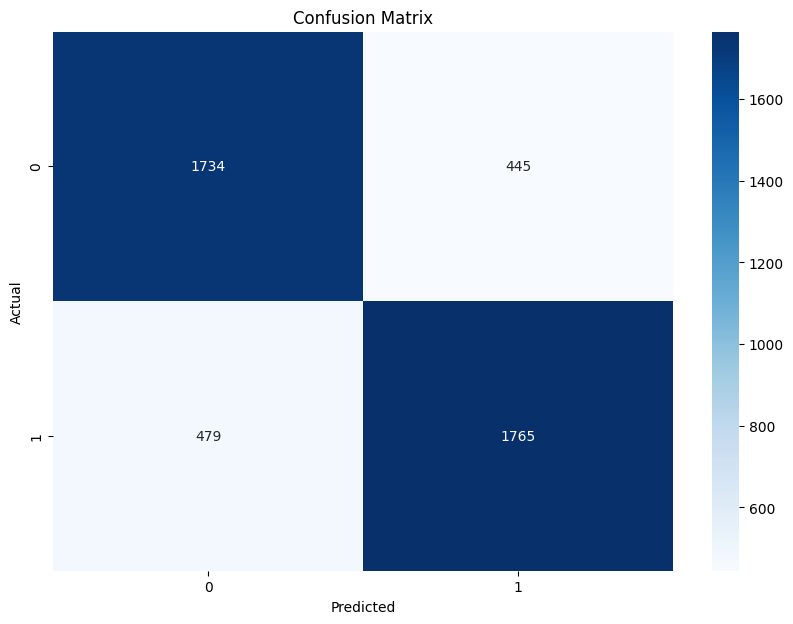

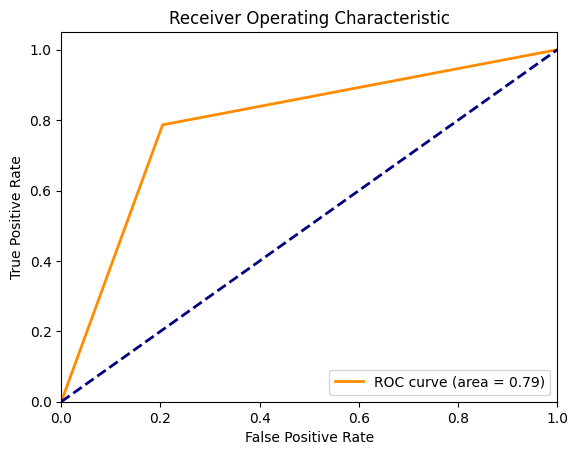

In [24]:
# Import necessary libraries
from sklearn.svm import SVC  # Import SVC from scikit-learn svm module
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# The features and labels ready after resampling
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(features_resampled, labels_resampled, test_size=0.2, random_state=42)

# Train an SVM model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_resampled = svm_model.predict(X_test_resampled)

# Display first 10 actual and predicted labels for reference
print("First 10 actual labels:", y_test_resampled[:10])
print("First 10 predicted labels:", y_pred_resampled[:10])

# Calculate metrics
accuracy = accuracy_score(y_test_resampled, y_pred_resampled)
precision = precision_score(y_test_resampled, y_pred_resampled, average='weighted')
recall = recall_score(y_test_resampled, y_pred_resampled, average='weighted')
f1 = f1_score(y_test_resampled, y_pred_resampled, average='weighted')
conf_matrix = confusion_matrix(y_test_resampled, y_pred_resampled)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve
# For binary classification
if len(set(y_test_resampled)) == 2:
    roc_auc = roc_auc_score(y_test_resampled, y_pred_resampled)
    fpr, tpr, _ = roc_curve(y_test_resampled, y_pred_resampled, pos_label=1)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("ROC Curve is only applicable for binary classification.")


### Summary of Evaluation Metrics WITH CLASSIFICATION REPORT
Evaluated its performance using several metrics:

Accuracy: Indicates the proportion of correctly classified instances.
Precision: Shows the accuracy of the positive predictions.
Recall (Sensitivity): Reflects the ability to capture all positive instances.
F1 Score: Balances Precision and Recall for an overall performance score.
Confusion Matrix: Visual representation of actual vs. predicted classifications.
ROC AUC: Measures the ability of the model to distinguish between classes.
These metrics provide a comprehensive view of the model's performance and help in understanding its strengths and weaknesses.

In [25]:
from sklearn.svm import SVC

# Train SVM model
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_clf.predict(X_test)

# Evaluate the model
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.89      0.82      2216
           1       0.81      0.61      0.70      1677

    accuracy                           0.77      3893
   macro avg       0.78      0.75      0.76      3893
weighted avg       0.78      0.77      0.76      3893

SVM Accuracy: 0.7698433085024403


### Hyperparameter Tuning of SVM
Grid SearchCV: Searches for the best hyperparameters (C and kernel for SVM) using cross-validation. param_grid: Specifies the hyperparameter combinations to explore. refit=True: Refits the model with the best parameters on the entire training set. verbose=2: Provides detailed output about the grid search process. grid_search.best_params_: Displays the optimal hyperparameters found. grid_search.best_score_: Shows the best cross-validation accuracy achieved with the optimal hyperparameters.

In [26]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}

# Perform Grid Search
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:")
print(grid_search.best_params_)

print("Best Score:")
print(grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ...............................C=0.1, kernel=linear; total time=  15.7s
[CV] END ...............................C=0.1, kernel=linear; total time=  16.0s
[CV] END ...............................C=0.1, kernel=linear; total time=  16.1s
[CV] END ...............................C=0.1, kernel=linear; total time=  15.6s
[CV] END ...............................C=0.1, kernel=linear; total time=  16.4s
[CV] END ..................................C=0.1, kernel=rbf; total time=  18.9s
[CV] END ..................................C=0.1, kernel=rbf; total time=  19.9s
[CV] END ..................................C=0.1, kernel=rbf; total time=  18.9s
[CV] END ..................................C=0.1, kernel=rbf; total time=  19.6s
[CV] END ..................................C=0.1, kernel=rbf; total time=  19.3s
[CV] END .................................C=1, kernel=linear; total time=  15.8s
[CV] END .................................C=1, ke

## Summary
### Data Loading and Preprocessing
Loaded the dataset and displayed basic information.
Checked for missing values and filled if necessary.
Encoded the labels.

### Handling Imbalanced Data
Used SMOTE to handle imbalanced data.
Visualized the class distribution before and after resampling.

### Training and Evaluating the SVM Model and diff metrix
Trained an SVM model using the linear kernel.
Evaluated the model using classification report, confusion matrix, and accuracy score.

### Hyperparameter Tuning of SVM
Performed Grid Search to find the best hyperparameters.
Displayed the best parameters and the best score.